In [157]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib
from sklearn.metrics import r2_score,mean_squared_error
from skimage.measure import block_reduce
from scipy.stats import gaussian_kde

In [130]:
def identifer(li):
    result = []
    for a in li:
        mean = np.nanmean(a)
        std = np.nanstd(a) 
        down = mean - 3 * std
        up =  mean + 3 * std
        n_a = np.where(a < down,np.nan,a)
        n_a = np.where(n_a > up,np.nan,n_a)
        result.append(n_a)
    return result

In [147]:
d_ahi = []
d_sgli = []
AHI_RAA = []
SGLI_RAA = []
AHI_SZA = []
SGLI_SZA = []
AHI_VZA = []
SGLI_VZA = []
site_name = 'ROI 9'
            
# with open("/home/liwei/Himawari_SGLI/{}_2020_PL.txt".format(site_name), "r") as f:
#     for line in f.readlines():
#         line = line.strip('\n') 
#         if line[0:8] == 'AHI TIME':
#             ahi = [line[9:13],line[14:16],line[17:19],line[20:22],line[23:25]]
            
#             d_ahi.append("".join(ahi))
#         elif line[0:9] == 'SGLI TIME':
#             sgli = [line[10:14],line[15:17],line[18:20]] 
#             d_sgli.append("".join(sgli))
#         elif line[0:5] == 'AHI_R':
#             AHI_RAA.append(line.split(' ')[0][8:])
#             SGLI_RAA.append(line.split(' ')[1][9:])
#         elif line[0:5] == 'AHI_V':
#             AHI_VZA.append(line.split(' ')[0][8:])
#             SGLI_VZA.append(line.split(' ')[1][9:])
#         elif line[0:5] == 'AHI_S':
#             AHI_SZA.append(line.split(' ')[0][8:])
#             SGLI_SZA.append(line.split(' ')[1][9:])
            
with open("/data01/people/liwei/Data/Matching_Result/{}_2021_PL.txt".format(site_name), "r") as f:
    for line in f.readlines():
        line = line.strip('\n')
        if line[0:8] == 'AHI TIME':
            ahi = [line[9:13],line[14:16],line[17:19],line[20:22],line[23:25]]
            
            d_ahi.append("".join(ahi))
        elif line[0:9] == 'SGLI TIME':
            sgli = [line[10:14],line[15:17],line[18:20]]
            
            d_sgli.append("".join(sgli))
        elif line[0:5] == 'AHI_R':
            AHI_RAA.append(line.split(' ')[0][8:])
            SGLI_RAA.append(line.split(' ')[1][9:])
        elif line[0:5] == 'AHI_V':
            AHI_VZA.append(line.split(' ')[0][8:])
            SGLI_VZA.append(line.split(' ')[1][9:])
        elif line[0:5] == 'AHI_S':
            AHI_SZA.append(line.split(' ')[0][8:])
            SGLI_SZA.append(line.split(' ')[1][9:])    
            
            
# AHI_data_b03 = []
AHI_data_b04 = []
for date in d_ahi:
    # with open('/home/liwei/Downloads/AHI_AC_RESULT/{}_AC/{}_{}_b03.dat'.format(date,date,site_name),'rb') as fp:
    #     AHI_data_b03.append(np.frombuffer(fp.read(),dtype='f4').reshape(24,24))
    with open('/data01/people/liwei/Data/AHI_Validation/{d}_AC/{d2}_{s}_b04.dat'.format(d=date,d2=date,s=site_name),'rb') as fp:
        AHI_data_b04.append(np.frombuffer(fp.read(),dtype='f4').reshape(12,12))


# SGLI_PI01 = []
SGLI_PI02 = []
for date in d_sgli:
    # with open('/media/liwei/Data/GCOM-C_RSRF_Valid/Rs_PI01/{}/Rs_PI01_{}_{}.dat'.format(date,date,site_name),'rb') as fp:
    #     SGLI_PI01.append(np.frombuffer(fp.read(),dtype='f4').reshape(24,24))
    with open('/data01/people/liwei/Data/SGLI_Validation/Rs_PI02/{}/Rs_PI02_{}_{}.dat'.format(date,date,site_name),'rb') as fp:
        SGLI_PI02.append(np.frombuffer(fp.read(),dtype='f4').reshape(12,12))
        
N_AHI_data_b04 = identifer(AHI_data_b04)
N_SGLI_PI02 = identifer(SGLI_PI02)

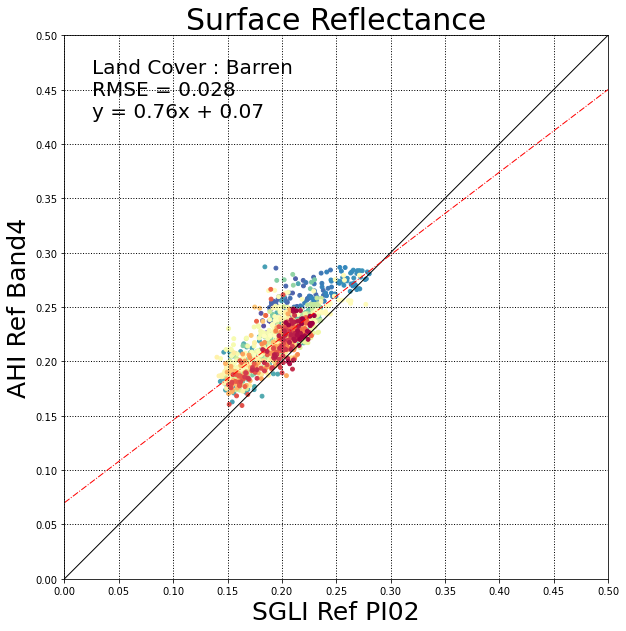

In [161]:
# LC = 'Evergreen Broadleaf Forest'
# slope = 0.954
# offset = 0.003

LC = 'Barren'
slope = 0.979
offset = 0.002758


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,aspect='equal')



color100 = list(matplotlib.colors.XKCD_COLORS.items())[220:250]
c = []
for (i,j) in color100:
    c.append(j)

    
SGLI_PI02_1 = np.array(N_SGLI_PI02).flatten()
AHI_data_b04_1 = np.array(N_AHI_data_b04).flatten()
nan_mask_1 = np.where(np.isnan(SGLI_PI02_1),False,True)
nan_mask_2 = np.where(np.isnan(AHI_data_b04_1),False,True)
nan_mask = []
for i in range(len(nan_mask_1)):
    if nan_mask_1[i] == False or  nan_mask_2[i] == False:
        nan_mask.append(False)
    else:
        nan_mask.append(True)
SGLI_PI02_1 = SGLI_PI02_1[nan_mask]
AHI_data_b04_1 = AHI_data_b04_1[nan_mask]
rmse = np.sqrt(mean_squared_error(SGLI_PI02_1 ,(AHI_data_b04_1 - offset) / slope))
p = np.polyfit(SGLI_PI02_1 ,(AHI_data_b04_1 - offset) / slope,1)    

k = round(p[0],2)
b = round(p[1],2)
rmse = round(rmse.astype('float64'),3)

xx = np.arange(0,0.51,0.05) 
yy = k * xx + b

x = np.arange(0,0.51,0.05) 
y = 1 * x


# Calculate the point density
xy = np.vstack([SGLI_PI02_1,(AHI_data_b04_1 - offset) / slope])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
# x, y, z = x[idx], y[idx], z[idx]
z = z[idx]




# for i in range (len(AHI_data_b04)):
#     ax.scatter(N_SGLI_PI02[i],(N_AHI_data_b04[i]-offset)/slope,marker='o', c=c[i],s=15,label=d_sgli[i])

ax.scatter(SGLI_PI02_1,(AHI_data_b04_1-offset)/slope,marker='o', c=z,s=15,cmap='Spectral_r')


# i = 12
# ax.scatter(N_AHI_data_b04, N_SGLI_PI02[i]*1.008,marker='o', c=c[i],s=15,label=d_sgli[i])


ax.plot(x,y,color='k',linewidth=1,linestyle='-') 
ax.plot(xx,yy,color='r',linewidth=1,linestyle='-.') 

ax.set_ylabel("AHI Ref Band4",fontsize=25)
ax.set_xlabel("SGLI Ref PI02",fontsize=25)
ax.grid(color='k', linestyle='dotted', linewidth=1,which='both')

axis_min = 0.0
axis_max = 0.5


text_x = axis_min + (axis_max - axis_min) * 0.05
text_y = axis_max - (axis_max - axis_min) * 0.15

ax.text(text_x,text_y,s = 'Land Cover : {}\nRMSE = {}\ny = {}x + {}'.format(LC,rmse,k,b),fontsize=20)

ax.set_xticks(np.arange(axis_min,axis_max+0.01,0.05))
ax.set_yticks(np.arange(axis_min,axis_max+0.01,0.05))

ax.set_aspect(1)
plt.xlim(axis_min,axis_max)
plt.ylim(axis_min,axis_max)

plt.title('Surface Reflectance',fontsize='30')
# plt.legend(loc = 4,fontsize=16)
plt.show()
fig.savefig('{} Band4 SR.jpg'.format(site_name),dpi = 1000,bbox_inches = 'tight')

In [49]:

AHI_B03_10 = block_reduce(np.array(AHI_data_b03), block_size=(1,2,2), func=np.nanmean)

NameError: name 'block_reduce' is not defined

In [55]:
b04 = AHI_data_b04[~np.isnan(AHI_data_b04)]
PI02 = SGLI_PI02[~np.isnan(SGLI_PI02)]

In [88]:
b03 = AHI_data_b03[~np.isnan(AHI_data_b03)]
PI01 = SGLI_PI01[~np.isnan(SGLI_PI01)]

In [92]:
p = np.polyfit(b03, PI01*1.175,1)
k = np.around(p[0],5)
b = np.around(p[1],5)
xx = np.arange(0,0.6,0.1) 
yy = k * xx + b

In [337]:
AHI_data_b04 = np.where(np.array(AHI_B03_10) > 0.15,np.nan,np.array(AHI_data_b04))
SGLI_PI02 = np.where(np.array(AHI_B03_10) > 0.15,np.nan,np.array(SGLI_PI02))

In [338]:
SGLI_PI02 = np.where(np.array(AHI_data_b04) > 0.3,np.nan,np.array(SGLI_PI02))
AHI_data_b04 = np.where(np.array(AHI_data_b04) > 0.3,np.nan,np.array(AHI_data_b04))

In [847]:
from sklearn.metrics import mean_squared_error, r2_score

In [861]:
np.polyfit(np.array(s).reshape(-1),np.array(a).reshape(-1),1)

array([0.75887838, 0.01836155])

In [117]:
d_ahi = []
d_sgli = []
AHI_RAA = []
SGLI_RAA = []
AHI_SZA = []
SGLI_SZA = []
AHI_VZA = []
SGLI_VZA = []
site_name = 'ROI 8'
            
with open("/home/liwei/Himawari_SGLI/{}_2020_PL.txt".format(site_name), "r") as f:
    for line in f.readlines():
        line = line.strip('\n') 
        if line[0:8] == 'AHI TIME':
            ahi = [line[9:13],line[14:16],line[17:19],line[20:22],line[23:25]]
            
            d_ahi.append("".join(ahi))
        elif line[0:9] == 'SGLI TIME':
            sgli = [line[10:14],line[15:17],line[18:20]] 
            d_sgli.append("".join(sgli))
        elif line[0:5] == 'AHI_R':
            AHI_RAA.append(line.split(' ')[0][8:])
            SGLI_RAA.append(line.split(' ')[1][9:])
        elif line[0:5] == 'AHI_V':
            AHI_VZA.append(line.split(' ')[0][8:])
            SGLI_VZA.append(line.split(' ')[1][9:])
        elif line[0:5] == 'AHI_S':
            AHI_SZA.append(line.split(' ')[0][8:])
            SGLI_SZA.append(line.split(' ')[1][9:])
            
with open("/home/liwei/Himawari_SGLI/{}_2021_PL.txt".format(site_name), "r") as f:
    for line in f.readlines():
        line = line.strip('\n')
        if line[0:8] == 'AHI TIME':
            ahi = [line[9:13],line[14:16],line[17:19],line[20:22],line[23:25]]
            
            d_ahi.append("".join(ahi))
        elif line[0:9] == 'SGLI TIME':
            sgli = [line[10:14],line[15:17],line[18:20]]
            
            d_sgli.append("".join(sgli))
        elif line[0:5] == 'AHI_R':
            AHI_RAA.append(line.split(' ')[0][8:])
            SGLI_RAA.append(line.split(' ')[1][9:])
        elif line[0:5] == 'AHI_V':
            AHI_VZA.append(line.split(' ')[0][8:])
            SGLI_VZA.append(line.split(' ')[1][9:])
        elif line[0:5] == 'AHI_S':
            AHI_SZA.append(line.split(' ')[0][8:])
            SGLI_SZA.append(line.split(' ')[1][9:])    
            
     

In [261]:
sza = abs(np.array(AHI_SZA).astype(float) - np.array(SGLI_SZA).astype(float))
vza = abs(np.array(AHI_VZA).astype(float) - np.array(SGLI_VZA).astype(float))
raa = abs(np.array(AHI_RAA).astype(float) - np.array(SGLI_RAA).astype(float))

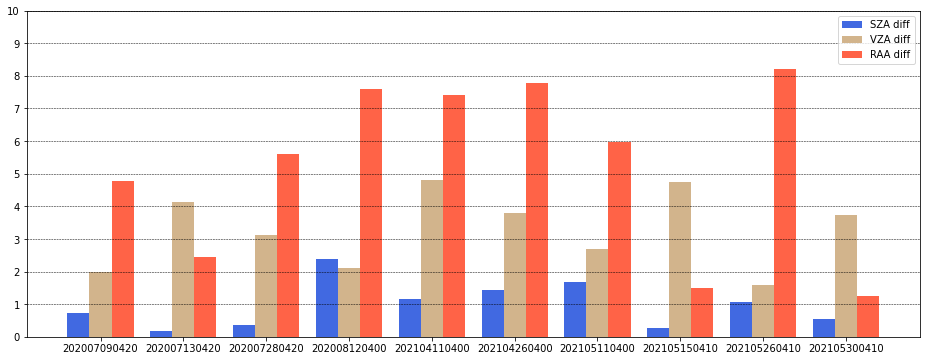

In [280]:
fig = plt.figure(figsize=(16,6))

size = a.size
x = np.arange(size)
total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label='SZA diff',color = 'royalblue')
plt.bar(x + width, b, width=width, label='VZA diff',color = 'tan')
plt.bar(x + 2 * width, c, width=width, label='RAA diff',color = 'tomato')
plt.xticks(range(0,size),d_ahi)
plt.yticks(np.arange(0,11,1))
plt.ylim((0, 10))

# plt.title("ROI 4 SZA/VZA/RAA",fontsize='xx-large')
plt.grid(axis = 'y',color = 'k', linestyle = '--', linewidth = 0.5)
plt.legend(loc = 'best')
plt.show()

In [70]:
d_sgli

['20210504',
 '20210519',
 '20210603',
 '20210618',
 '20210730',
 '20210810',
 '20210814',
 '20210902']

In [71]:
d_ahi = ['202105040400',
 '202105190400',
 '202107300410',
 '202108100410',
 '202108140400',
 '202109020400']

d_sgli = ['20210504',
 '20210519',
 '20210730',
 '20210810',
 '20210814',
 '20210902']

In [72]:
# AHI_data_b03_toa = []
AHI_data_b04_toa = []
for date in d_ahi:
    # with open('/home/liwei/Downloads/AHI_AC_RESULT/{}_AC/{}_{}_b03.dat'.format(date,date,site_name),'rb') as fp:
    #     AHI_data_b03.append(np.frombuffer(fp.read(),dtype='f4').reshape(24,24))
    with open('/data01/people/liwei/Data/AHI_Validation/{d}_AC/{d2}_{s}_b04_toa.dat'.format(d=date,d2=date,s=site_name),'rb') as fp:
        AHI_data_b04_toa.append(np.frombuffer(fp.read(),dtype='f4').reshape(12,12))


# SGLI_PI01 = []
SGLI_PI02_toa = []
for date in d_sgli:
    # with open('/media/liwei/Data/GCOM-C_RSRF_Valid/Lt_PI01/{}/Lt_PI01_{}_{}.dat'.format(date,date,site_name),'rb') as fp:
    #     SGLI_PI01_toa.append(np.frombuffer(fp.read(),dtype='f4').reshape(24,24))
    with open('/data01/people/liwei/Data/SGLI_Validation/Lt_PI02/{}/Lt_PI02_{}_{}_toa.dat'.format(date,date,site_name),'rb') as fp:
        SGLI_PI02_toa.append(np.frombuffer(fp.read(),dtype='f4').reshape(12,12))

In [26]:
AHI_data_b04 = np.array(AHI_data_b04)
# AHI_data_b03 = np.array(AHI_data_b03)
# SGLI_PI01 = np.array(SGLI_PI01)
SGLI_PI02 = np.array(SGLI_PI02)

In [40]:
N_AHI_data_b04 = identifer(AHI_data_b04)
N_SGLI_PI02 = identifer(SGLI_PI02)

# N_AHI_data_b03 = identifer(AHI_data_b03)
# N_SGLI_PI01 = identifer(SGLI_PI01)

NameError: name 'AHI_data_b03_toa' is not defined

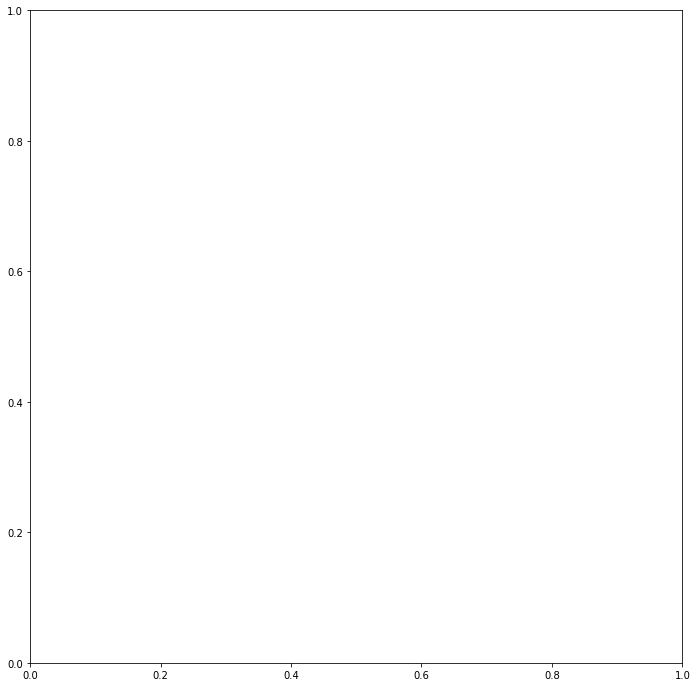

In [73]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,aspect='equal')



color100 = list(matplotlib.colors.XKCD_COLORS.items())[90:120]
c = []
for (i,j) in color100:
    c.append(j)
    
for i in range(len(AHI_data_b03_toa)):
    ax.scatter(AHI_data_b03_toa[i]/100, SGLI_PI01_toa[i],marker='s',s=5,c=c[i],label=d_ahi[i])
    
# plt.plot(xx,yy,color='gold',linewidth=2,linestyle='-')
# ax.scatter(AHI_data_b04, SGLI_PI02*0.989,marker='s',s=9,c='k')    

# ax.set_xticks(np.arange(10,160,20))
# ax.set_yticks(np.arange(10,160,20))
ax.set_xlabel("AHI TOA Ref Band3",fontsize='xx-large')
ax.set_ylabel("SGLI TOA Ref PI01",fontsize='xx-large')
ax.grid(color='k', linestyle='dotted', linewidth=1,which='both')

ax.set_aspect(1)
plt.xlim(0,0.3)
plt.ylim(0,0.3)
plt.title('TOA Ref',fontsize='xx-large')
plt.legend()
plt.show()
# fig.savefig('{} Band3.jpg'.format(site_name),dpi = 1000,bbox_inches = 'tight')

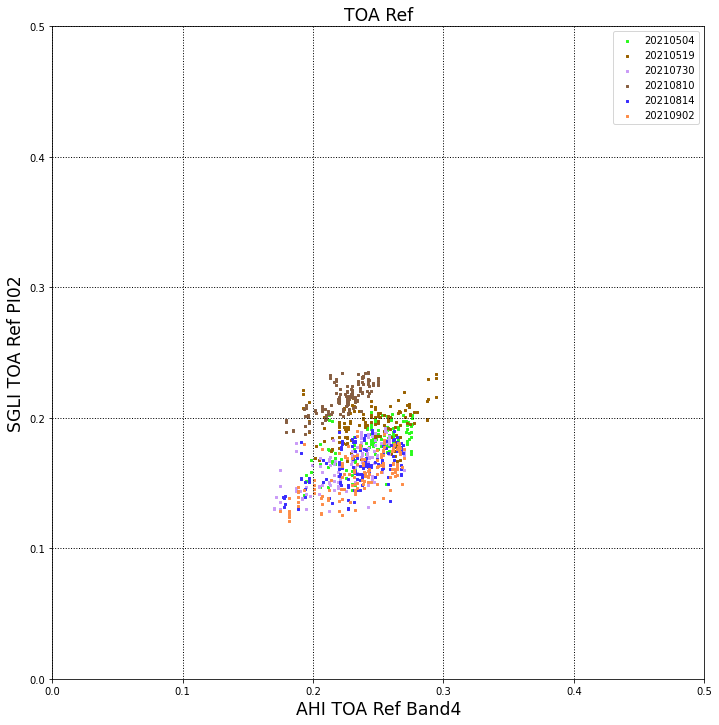

In [76]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,aspect='equal')


color100 = list(matplotlib.colors.XKCD_COLORS.items())[90:120]
c = []
for (i,j) in color100:
    c.append(j)

for i in range(len(AHI_data_b04_toa)):
    ax.scatter(AHI_data_b04_toa[i]/100*0.998, SGLI_PI02_toa[i],marker='s',s=5,c=c[i],label=d_sgli[i])
    
# plt.plot(xx,yy,color='gold',linewidth=2,linestyle='-')
# ax.scatter(AHI_data_b04, SGLI_PI02*0.989,marker='s',s=9,c='k')    

# ax.set_xticks(np.arange(0,0.6,0.1))
# ax.set_yticks(np.arange(0,0.6,0.1))
ax.set_xlabel("AHI TOA Ref Band4",fontsize='xx-large')
ax.set_ylabel("SGLI TOA Ref PI02",fontsize='xx-large')
ax.grid(color='k', linestyle='dotted', linewidth=1,which='both')

ax.set_aspect(1)
plt.xlim(0,0.5)
plt.ylim(0,0.5)
plt.title('TOA Ref',fontsize='xx-large')
plt.legend()
plt.show()
# fig.savefig('{} Band4.jpg'.format(site_name),dpi = 1000,bbox_inches = 'tight')

NameError: name 'AHI_data_b04_rad' is not defined

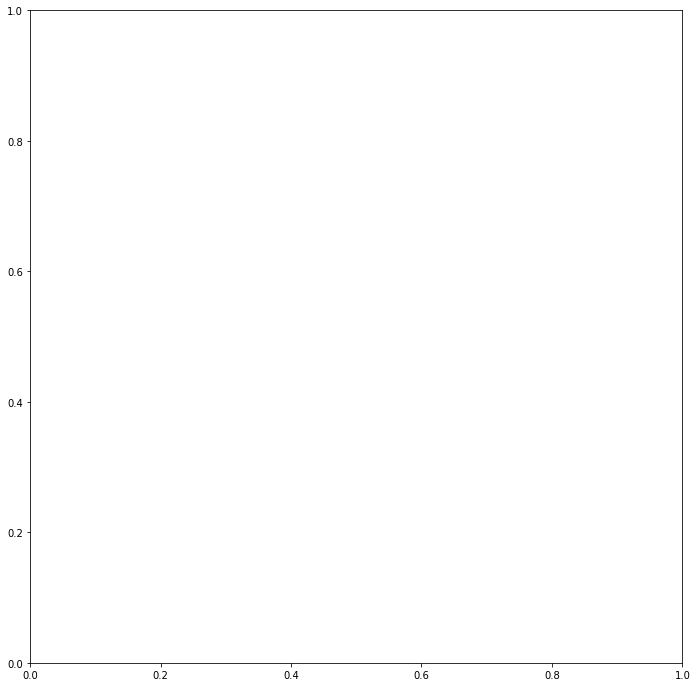

In [100]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,aspect='equal')


color100 = list(matplotlib.colors.XKCD_COLORS.items())[90:150]
c = []
for (i,j) in color100:
    c.append(j)

for i in range(len(AHI_data_b04_rad)):
    ax.scatter(AHI_data_b04_rad[i], SGLI_PI02_rad[i],marker='s',s=5,c=c[i],label=d_sgli[i])
    
# plt.plot(xx,yy,color='gold',linewidth=2,linestyle='-')
# ax.scatter(AHI_data_b04, SGLI_PI02*0.989,marker='s',s=9,c='k')    

# ax.set_xticks(np.arange(0,0.6,0.1))
# ax.set_yticks(np.arange(0,0.6,0.1))
ax.set_xlabel("AHI Radiance Band4",fontsize='xx-large')
ax.set_ylabel("SGLI Radiance PI02",fontsize='xx-large')
ax.grid(color='k', linestyle='dotted', linewidth=1,which='both')

ax.set_aspect(1)
# plt.xlim(40,200)
# plt.ylim(40,200)
plt.title('TOA Radiance (W/m2/sr/um)',fontsize='xx-large')
plt.legend()
plt.show()
# fig.savefig('{} Band4.jpg'.format(site),dpi = 1000,bbox_inches = 'tight')

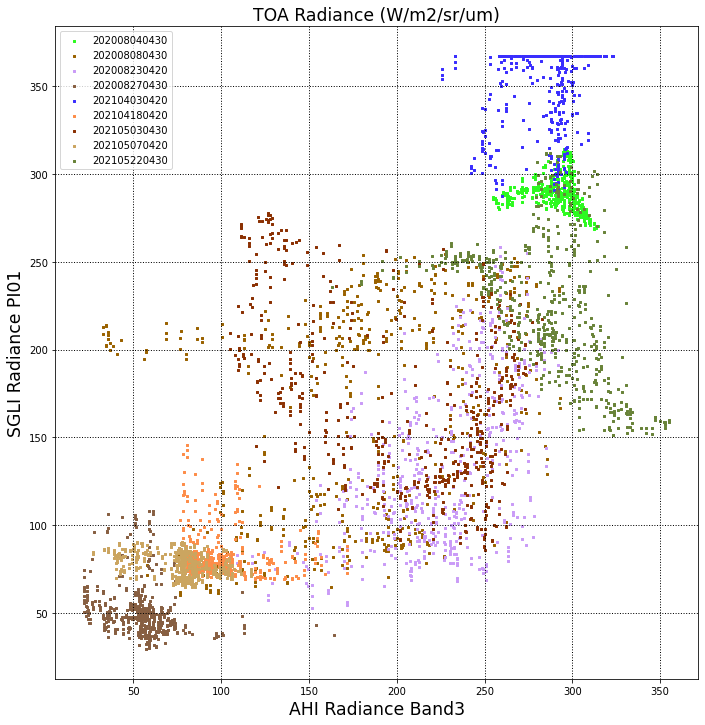

In [89]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,aspect='equal')



color100 = list(matplotlib.colors.XKCD_COLORS.items())[90:150]
c = []
for (i,j) in color100:
    c.append(j)
    
for i in range(len(AHI_data_b03_rad)):
    ax.scatter(AHI_data_b03_rad[i], SGLI_PI01_rad[i],marker='s',s=5,c=c[i],label=d_ahi[i])
    
# plt.plot(xx,yy,color='gold',linewidth=2,linestyle='-')
# ax.scatter(AHI_data_b04, SGLI_PI02*0.989,marker='s',s=9,c='k')    

# ax.set_xticks(np.arange(10,160,20))
# ax.set_yticks(np.arange(10,160,20))
ax.set_xlabel("AHI Radiance Band3",fontsize='xx-large')
ax.set_ylabel("SGLI Radiance PI01",fontsize='xx-large')
ax.grid(color='k', linestyle='dotted', linewidth=1,which='both')

ax.set_aspect(1)
# plt.xlim(10,400)
# plt.ylim(10,400)
plt.title('TOA Radiance (W/m2/sr/um)',fontsize='xx-large')
plt.legend()
plt.show()
# fig.savefig('{} Band3.jpg'.format(site_name),dpi = 1000,bbox_inches = 'tight')

In [124]:
r2_score(np.array(AHI_data_b03_1*0.998), np.array(SGLI_PI01_1))

0.16100517441890427

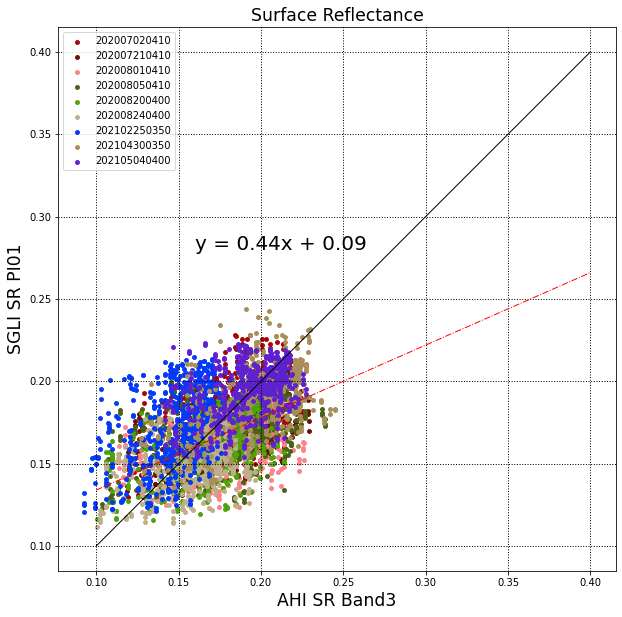

In [113]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,aspect='equal')



color100 = list(matplotlib.colors.XKCD_COLORS.items())[220:250]
c = []
for (i,j) in color100:
    c.append(j)

    
    
    
SGLI_PI01_1 = np.array(SGLI_PI01).flatten()
AHI_data_b03_1 = np.array(AHI_data_b03).flatten()
nan_mask = np.where(np.isnan(SGLI_PI01_1),False,True)
SGLI_PI01_1 = SGLI_PI01_1[nan_mask]
AHI_data_b03_1 = AHI_data_b03_1[nan_mask]

r2 = r2_score(np.array(AHI_data_b03_1).reshape(-1)*0.978, np.array(SGLI_PI01_1).reshape(-1))
p = np.polyfit(AHI_data_b03_1*0.978,SGLI_PI01_1,1)    

k = round(p[0],2)
b = round(p[1],2)

xx = np.arange(0.1,0.4,0.05) 
yy = k * xx + b

x = np.arange(0.1,0.4,0.05) 
y = 1 * x


for i in range(len(AHI_data_b03)):
    ax.scatter(AHI_data_b03[i]*0.978, SGLI_PI01[i],marker='o', c=c[i],s=15,label=d_ahi[i])
#     ax.scatter(AHI_data_b03_toa[i]/100*0.991, SGLI_PI01_toa[i],marker='1',s=15,c='gray',alpha=0.5)

    # i=9
# ax.scatter(AHI_data_b03[i], SGLI_PI01[i],marker='s',s=5,c=c[i],label=d_ahi[i])

ax.plot(x,y,color='k',linewidth=1,linestyle='-') 
ax.plot(xx,yy,color='r',linewidth=1,linestyle='-.') 

ax.set_xlabel("AHI SR Band3",fontsize='xx-large')
ax.set_ylabel("SGLI SR PI01",fontsize='xx-large')
ax.grid(color='k', linestyle='dotted', linewidth=1,which='both')
ax.text(0.16,0.28,s = 'y = {}x + {}'.format(k,b),fontsize=20)

ax.set_aspect(1)
# plt.xlim(0.1,0.3)
# plt.ylim(0.1,0.3)
plt.title('Surface Reflectance',fontsize='xx-large')
plt.legend()
plt.show()
# fig.savefig('{} Band3.jpg'.format(site_name),dpi = 1000,bbox_inches = 'tight')

In [34]:
fig ,axes = plt.subplots(2,len(AHI_data_b03_toa), figsize=(60, 6))
for i in range(len(AHI_data_b03)):
    im = axes[0,i].imshow(AHI_data_b03_toa[i],cmap='gray')
    axes[0,i].set_xticks([])
    axes[0,i].set_yticks([])
    axes[0,i].set_title('AHI Band3\n{}'.format(d_ahi[i]))
    im = axes[1,i].imshow(SGLI_PI01_toa[i],cmap='gray')
    axes[1,i].set_xticks([])
    axes[1,i].set_yticks([])
    axes[1,i].set_title('SGLI PI01\n{}'.format(d_sgli[i]))
    
cb = fig.colorbar(im,ax=axes)
plt.show()
fig.savefig('{} band3 image.jpg'.format(site_name),dpi = 1000,bbox_inches = 'tight')

NameError: name 'AHI_data_b03_toa' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

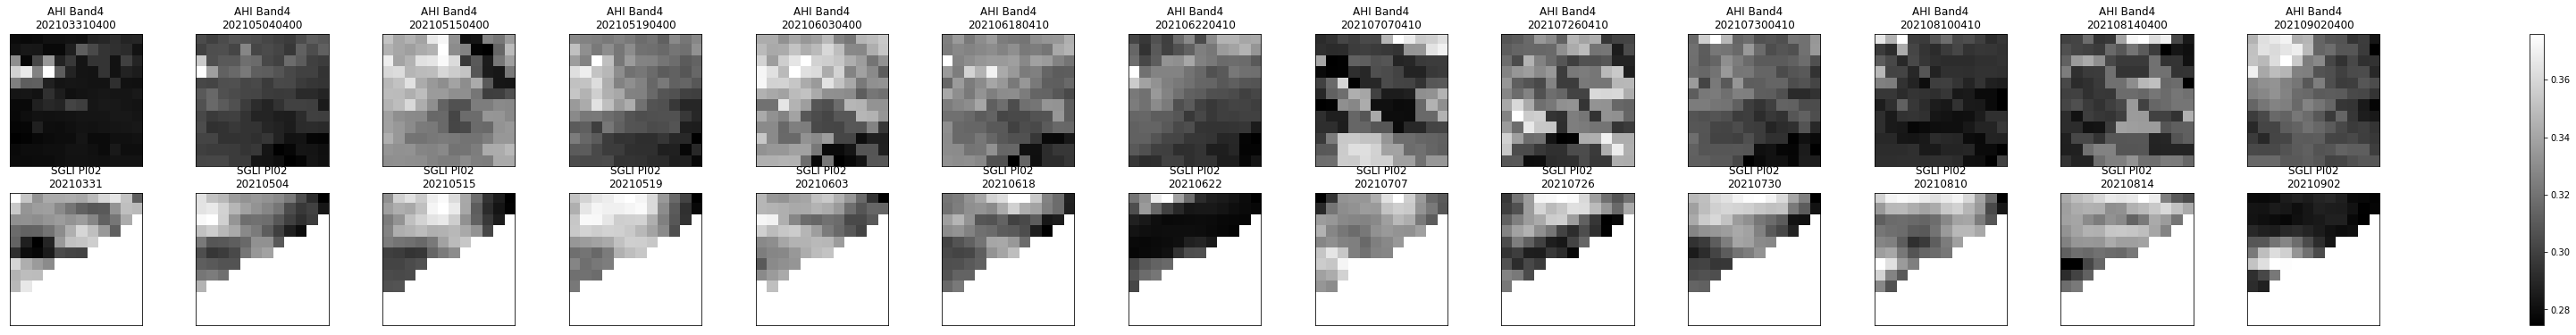

In [26]:
fig ,axes = plt.subplots(2,len(AHI_data_b04), figsize=(60, 6))
for i in range(len(AHI_data_b04)):
    im = axes[0,i].imshow(AHI_data_b04[i],cmap='gray')
    axes[0,i].set_xticks([])
    axes[0,i].set_yticks([])
    axes[0,i].set_title('AHI Band4\n{}'.format(d_ahi[i]))
    im = axes[1,i].imshow(SGLI_PI02[i],cmap='gray')
    axes[1,i].set_xticks([])
    axes[1,i].set_yticks([])
    axes[1,i].set_title('SGLI PI02\n{}'.format(d_sgli[i]))
    
cb = fig.colorbar(im,ax=axes)
plt.show
# fig.savefig('{} band4 image.jpg'.format(site_name),dpi = 1000,bbox_inches = 'tight')

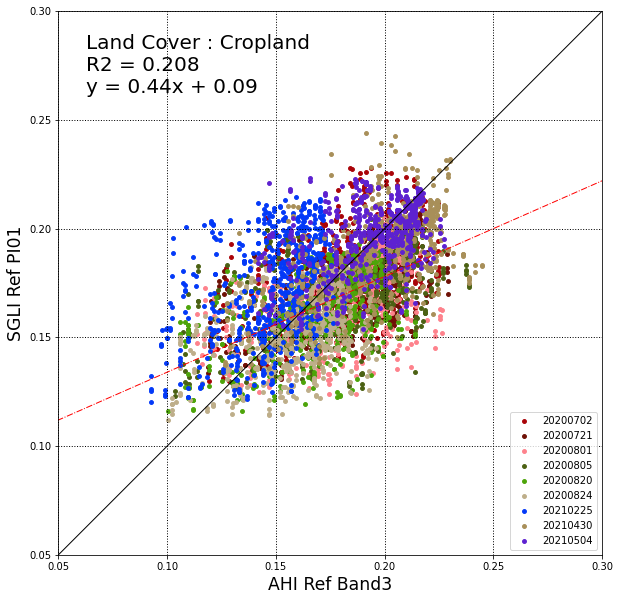

In [128]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,aspect='equal')



color100 = list(matplotlib.colors.XKCD_COLORS.items())[220:250]
c = []
for (i,j) in color100:
    c.append(j)


SGLI_PI01_1 = np.array(SGLI_PI01).flatten()
AHI_data_b03_1 = np.array(AHI_data_b03).flatten()
nan_mask = np.where(np.isnan(SGLI_PI01_1),False,True)
SGLI_PI01_1 = SGLI_PI01_1[nan_mask]
AHI_data_b03_1 = AHI_data_b03_1[nan_mask]

r2 = r2_score(AHI_data_b03_1*0.978, SGLI_PI01_1)
p = np.polyfit(AHI_data_b03_1*0.978,SGLI_PI01_1,1)    

k = round(p[0],2)
b = round(p[1],2)
r2 = round(r2,3)
xx = np.arange(0.0,0.31,0.03) 
yy = k * xx + b

x = np.arange(0.0,0.31,0.03) 
y = 1 * x


for i in range (len(AHI_data_b03)):

    ax.scatter(AHI_data_b03[i]*0.978,SGLI_PI01[i],marker='o', c=c[i],s=15,label=d_sgli[i])
#     ax.scatter(AHI_data_b03_toa[l[i]]/100, SGLI_PI01_toa[l[i]],marker='+',s=10,c=c[i],label=d_sgli[l[i]]+'TOA',alpha=0.5)


# ax.scatter(AHI_data_b03_1,SGLI_PI01_1*1.1750,marker='o', c=c[i],s=15,label=d_sgli[i])

ax.plot(x,y,color='k',linewidth=1,linestyle='-') 
ax.plot(xx,yy,color='r',linewidth=1,linestyle='-.') 


ax.set_xlabel("AHI Ref Band3",fontsize='xx-large')
ax.set_ylabel("SGLI Ref PI01",fontsize='xx-large')
ax.grid(color='k', linestyle='dotted', linewidth=1,which='both')

axis_min = 0.05
axis_max = 0.3


text_x = axis_min + (axis_max - axis_min) * 0.05
text_y = axis_max - (axis_max - axis_min) * 0.15

ax.text(text_x,text_y,s = 'Land Cover : Cropland\nR2 = {}\ny = {}x + {}'.format(r2,k,b),fontsize=20)

ax.set_xticks(np.arange(axis_min,axis_max+0.01,0.05))
ax.set_yticks(np.arange(axis_min,axis_max+0.01,0.05))

ax.set_aspect(1)
plt.xlim(axis_min,axis_max)
plt.ylim(axis_min,axis_max)
plt.legend(loc = 4)
plt.show()
fig.savefig('{} Band3 SR.jpg'.format(site_name),dpi = 1000,bbox_inches = 'tight')

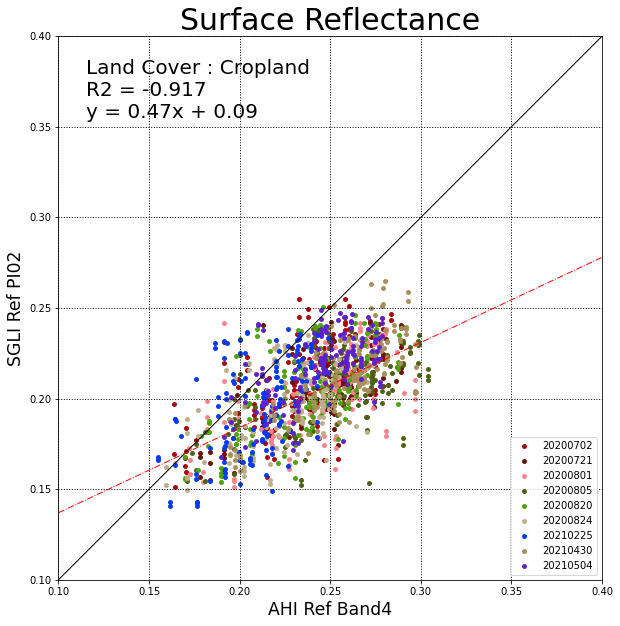

In [135]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,aspect='equal')



color100 = list(matplotlib.colors.XKCD_COLORS.items())[220:250]
c = []
for (i,j) in color100:
    c.append(j)


SGLI_PI02_1 = np.array(SGLI_PI02).flatten()
AHI_data_b04_1 = np.array(AHI_data_b04).flatten()
nan_mask = np.where(np.isnan(SGLI_PI02_1),False,True)
SGLI_PI02_1 = SGLI_PI02_1[nan_mask]
AHI_data_b04_1 = AHI_data_b04_1[nan_mask]
r2 = r2_score(AHI_data_b04_1*0.998,SGLI_PI02_1)

p = np.polyfit(AHI_data_b04_1*0.998, SGLI_PI02_1,1)    

k = round(p[0],2)
b = round(p[1],2)
r2 = round(r2,3)
xx = np.arange(0.1,0.41,0.05) 
yy = k * xx + b

x = np.arange(0.1,0.41,0.05) 
y = 1 * x



for i in range (len(AHI_data_b04)):
    ax.scatter(AHI_data_b04[i]*0.998, SGLI_PI02[i],marker='o', c=c[i],s=15,label=d_sgli[i])
#     ax.scatter(AHI_data_b04_toa[l[i]]/100, SGLI_PI02_toa[l[i]],marker='+',s=10,c=c[i],label=d_sgli[l[i]]+'TOA',alpha=0.5)

ax.plot(x,y,color='k',linewidth=1,linestyle='-') 
ax.plot(xx,yy,color='r',linewidth=1,linestyle='-.') 

ax.set_xlabel("AHI Ref Band4",fontsize='xx-large')
ax.set_ylabel("SGLI Ref PI02",fontsize='xx-large')
ax.grid(color='k', linestyle='dotted', linewidth=1,which='both')

axis_min = 0.1
axis_max = 0.4


text_x = axis_min + (axis_max - axis_min) * 0.05
text_y = axis_max - (axis_max - axis_min) * 0.15

ax.text(text_x,text_y,s = 'Land Cover : Cropland\nR2 = {}\ny = {}x + {}'.format(r2,k,b),fontsize=20)

ax.set_xticks(np.arange(axis_min,axis_max+0.01,0.05))
ax.set_yticks(np.arange(axis_min,axis_max+0.01,0.05))

ax.set_aspect(1)
plt.xlim(axis_min,axis_max)
plt.ylim(axis_min,axis_max)

plt.title('Surface Reflectance',fontsize='30')
plt.legend(loc = 4)
plt.show()
fig.savefig('{} Band4 SR.jpg'.format(site_name),dpi = 1000,bbox_inches = 'tight')

In [137]:
al = np.array([[0.884, 0.875, 0.777, 0.632, 0.683, 0.881, 1.219, 1.091, 0.874,
        0.717, 0.974, 1.298],
       [0.839, 1.095, 0.943, 0.713, 0.829, 1.005, 1.199, 0.997, 0.899,
        0.819, 0.942, 1.177],
       [0.866, 1.222, 1.128, 0.871, 0.758, 1.011, 1.185, 1.041, 0.88 ,
        0.967, 1.186, 1.38 ],
       [0.833, 1.172, 1.247, 1.06 , 0.792, 0.941, 1.239, 1.256, 1.087,
        0.959, 1.222, 1.629],
       [1.021, 1.074, 1.268, 1.084, 0.919, 1.079, 1.466, 1.631, 1.383,
        1.194, 1.305, 1.566],
       [1.088, 1.388, 1.525, 1.323, 1.095, 1.283, 1.449, 1.758, 1.712,
        1.489, 1.513, 1.7  ],
       [1.362, 1.448, 1.461, 1.493, 1.462, 1.605, 1.674, 1.81 , 1.858,
        1.823, 1.859, 1.824],
       [1.638, 1.553, 1.25 , 1.418, 1.714, 1.479, 1.555, 1.827, 1.707,
        1.55 , 1.707, 1.712],
       [1.224, 1.111, 1.089, 1.072, 1.369, 1.474, 1.244, 1.452, 1.321,
        1.384, 1.348, 1.397],
       [0.969, 0.816, 0.859, 0.932, 1.091, 1.388, 1.118, 1.074, 1.067,
        1.162, 1.16 , 1.406],
       [0.909, 0.727, 0.906, 1.114, 0.959, 1.143, 1.089, 0.979, 1.178,
        1.304, 1.484, 1.425],
       [0.674, 0.72 , 0.664, 0.822, 0.719, 0.916, 0.888, 0.961, 1.18 ,
        1.29 , 1.344, 1.363]])

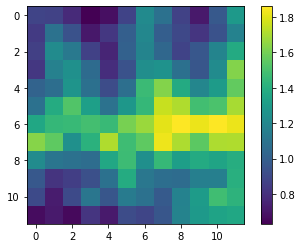

In [140]:
plt.imshow(al)
plt.colorbar()